In [108]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.stats import f_oneway

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

from statsmodels.stats.outliers_influence import variance_inflation_factor 
import statsmodels.api as sm
import statsmodels.formula.api as smf

import seaborn as sns

import re

In [109]:
car = pd.read_csv('/mnt/All/Downloads/UserCarData.csv')

In [110]:
car.rename (columns = {
    'Sales_ID':'ID продажи',
    'name':'Марка авто',
    'year':'Год производства',
    'selling_price':'Цена продажи',
    'km_driven':'Пробег',
    'Region':'Регион',
    'State or Province':'Штат или провинция',
    'City':'Город',
    'fuel':'Топливо',
    'seller_type':'Тип продавца',
    'transmission':'Трансмиссия',
    'owner':'Владелец',
    'mileage':'Километраж',
    'engine':'Двигатель',
    'max_power':'Максимальная мощность',
    'torque':'Крутящий момент',
    'seats':'Сидячие места',
    'sold':'Продано',
    }, inplace = True)

In [111]:
car

,ID продажи,Марка авто,Год производства,Цена продажи,Пробег,Регион,Штат или провинция,Город,Топливо,Тип продавца,Трансмиссия,Владелец,Километраж,Двигатель,Максимальная мощность,Крутящий момент,Сидячие места,Продано
0,1,Maruti,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First_Owner,23.40,1248,74.00,190Nm@ 2000rpm,5,Y
1,2,Skoda,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second_Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,Y
2,3,Honda,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third_Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5,Y
3,4,Hyundai,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First_Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5,Y
4,5,Maruti,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First_Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,8124,Hyundai,2013,320000,110000,Central,Texas,Plano,Petrol,Individual,Manual,First_Owner,18.50,1197,82.85,113.7Nm@ 4000rpm,5,N
7902,8125,Hyundai,2007,135000,119000,Central,Texas,Port Arthur,Diesel,Individual,Manual,Fourth_Above_Owner,16.80,1493,110.00,"24@ 1,900-2,750(kgm@ rpm)",5,N
7903,8126,Maruti,2009,382000,120000,Central,Texas,Port Arthur,Diesel,Individual,Manual,First_Owner,19.30,1248,73.90,190Nm@ 2000rpm,5,N
7904,8127,Tata,2013,290000,25000,East,Massachusetts,Lunenburg,Diesel,Individual,Manual,First_Owner,23.57,1396,70.00,140Nm@ 1800-3000rpm,5,N


In [112]:
car.loc[:,'Крутящий момент']= car.loc[car['Крутящий момент'].notna(),'Крутящий момент'].apply(lambda x: re.search(r"[\d\.,]+",x).group())
car.loc[:,'Крутящий момент']= car.loc[car['Крутящий момент'].notna(),'Крутящий момент'].astype("float")

/tmp/ipykernel_185105/3652520943.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  car.loc[:,'Крутящий момент']= car.loc[car['Крутящий момент'].notna(),'Крутящий момент'].astype("float")


In [113]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID продажи             7906 non-null   int64  
 1   Марка авто             7906 non-null   object 
 2   Год производства       7906 non-null   int64  
 3   Цена продажи           7906 non-null   int64  
 4   Пробег                 7906 non-null   int64  
 5   Регион                 7906 non-null   object 
 6   Штат или провинция     7906 non-null   object 
 7   Город                  7906 non-null   object 
 8   Топливо                7906 non-null   object 
 9   Тип продавца           7906 non-null   object 
 10  Трансмиссия            7906 non-null   object 
 11  Владелец               7906 non-null   object 
 12  Километраж             7906 non-null   float64
 13  Двигатель              7906 non-null   int64  
 14  Максимальная мощность  7906 non-null   float64
 15  Крут

In [114]:
txt=car[car.applymap(type)==str].dropna(axis=1)
for x in txt:
  print(x, len(car[x].unique()))

Марка авто 31
Регион 4
Штат или провинция 49
Город 1310
Топливо 4
Тип продавца 3
Трансмиссия 2
Владелец 5
Продано 2


In [115]:
car=car.drop(['Город','Штат или провинция',"ID продажи"],axis=1)

<Figure size 640x480 with 0 Axes>

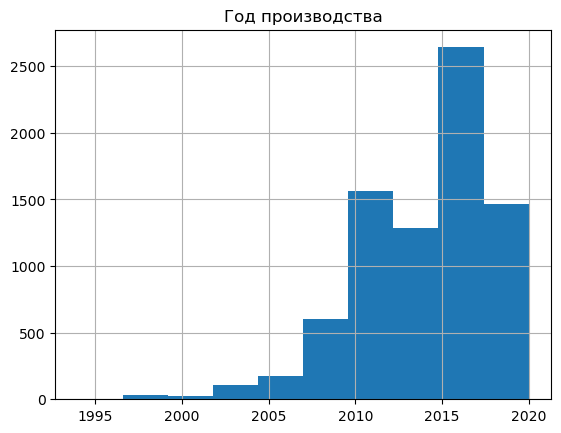

<Figure size 640x480 with 0 Axes>

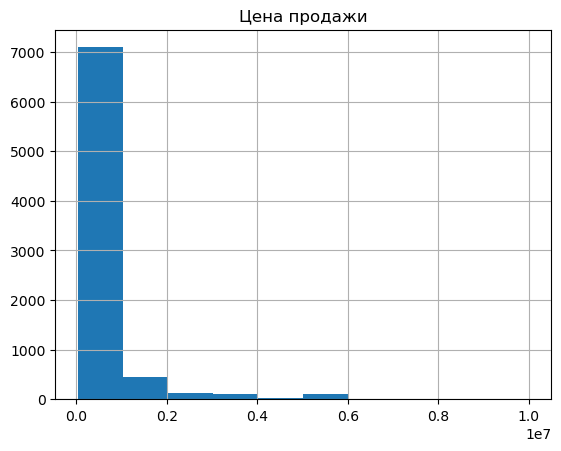

<Figure size 640x480 with 0 Axes>

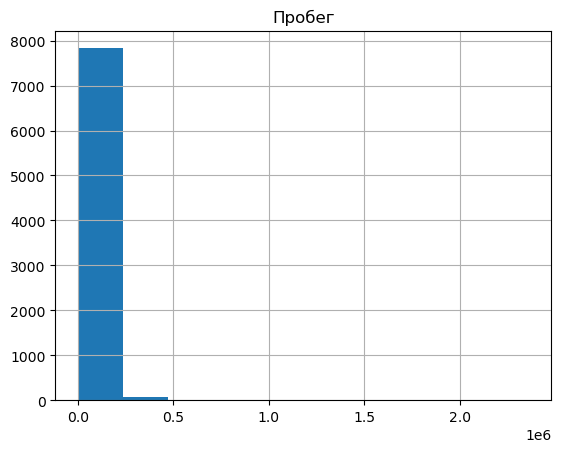

<Figure size 640x480 with 0 Axes>

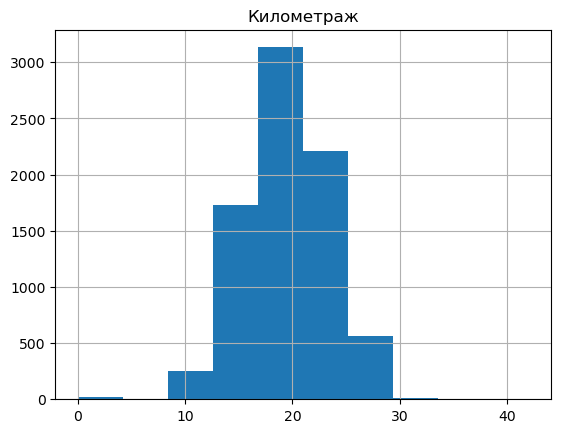

<Figure size 640x480 with 0 Axes>

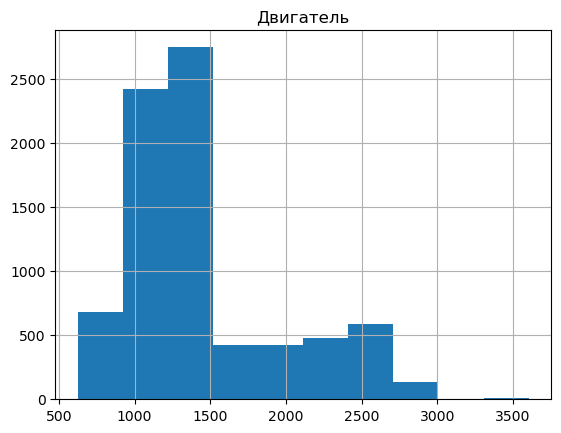

<Figure size 640x480 with 0 Axes>

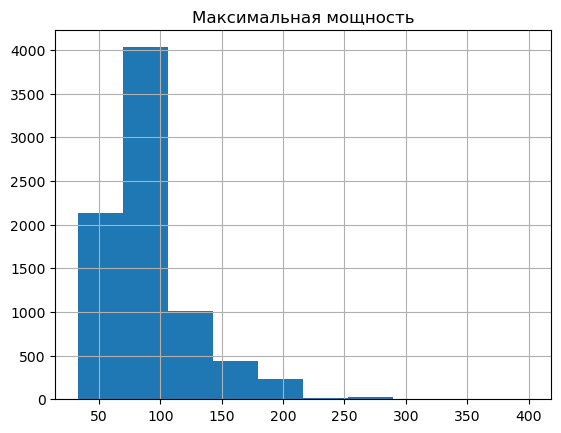

<Figure size 640x480 with 0 Axes>

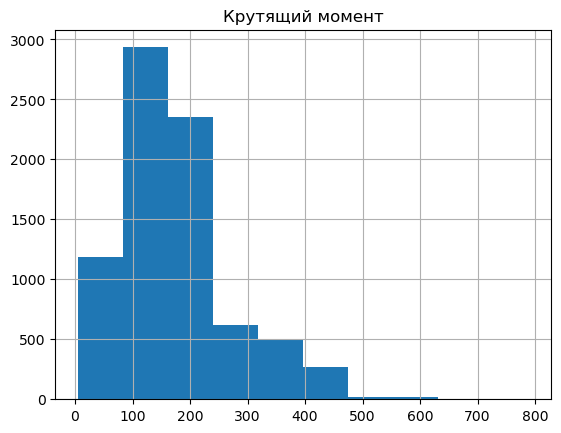

<Figure size 640x480 with 0 Axes>

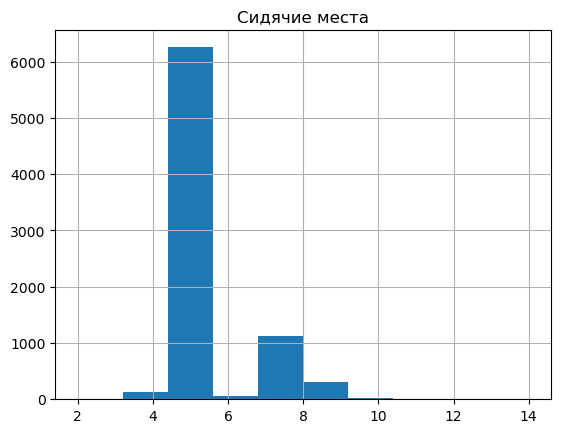

In [116]:
df_inta=car.select_dtypes(include=['float64','int64'])
#удаление всех выбросов повышает точность
for column in df_inta:
    plt.figure()
    df_inta.hist(column=[column])
dum=car.dropna()

<Figure size 640x480 with 0 Axes>

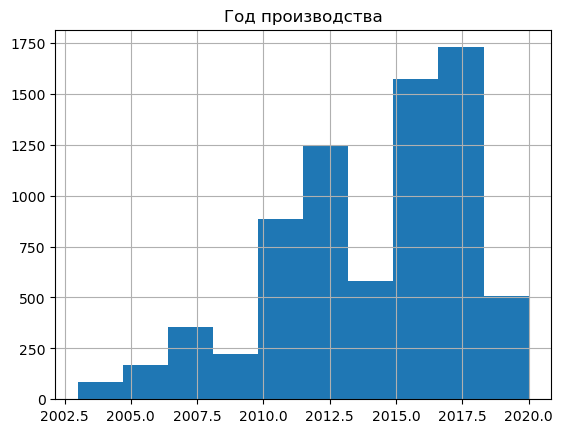

<Figure size 640x480 with 0 Axes>

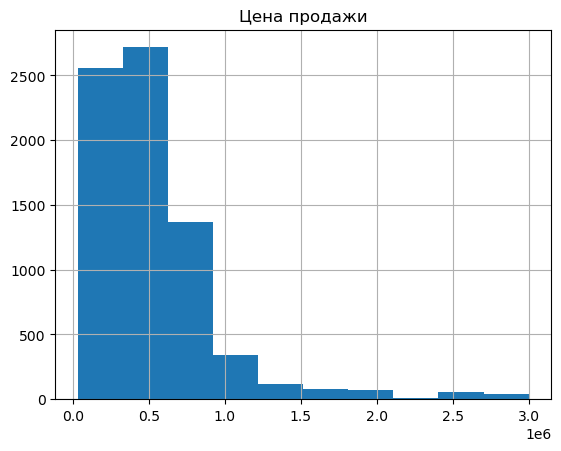

<Figure size 640x480 with 0 Axes>

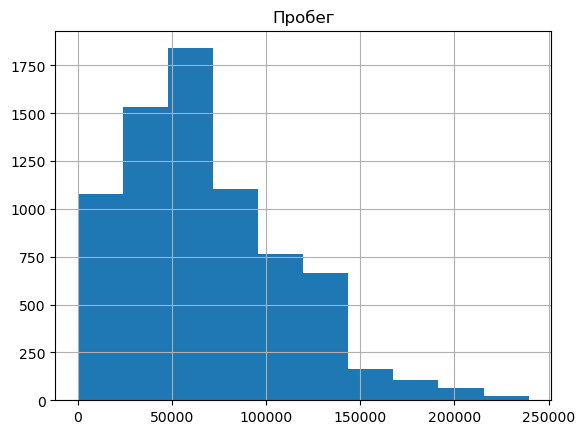

<Figure size 640x480 with 0 Axes>

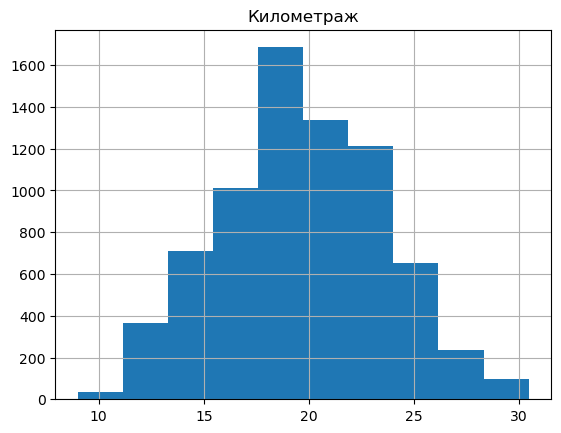

<Figure size 640x480 with 0 Axes>

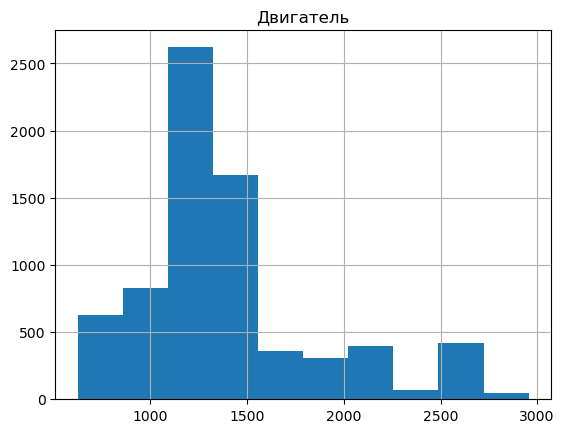

<Figure size 640x480 with 0 Axes>

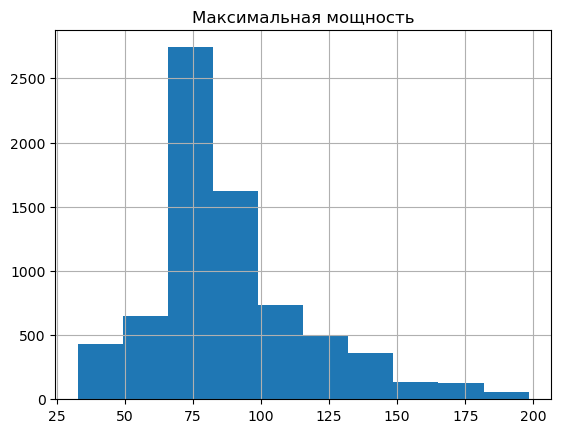

<Figure size 640x480 with 0 Axes>

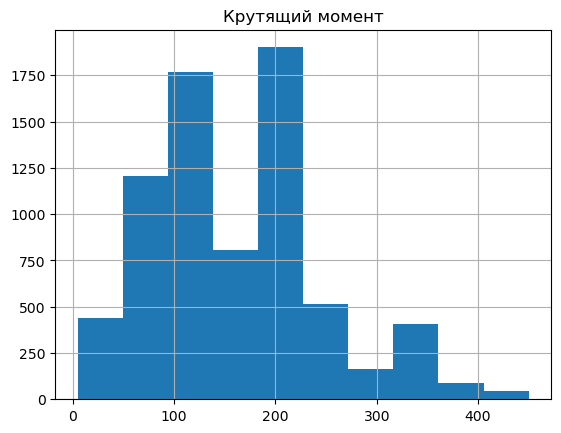

<Figure size 640x480 with 0 Axes>

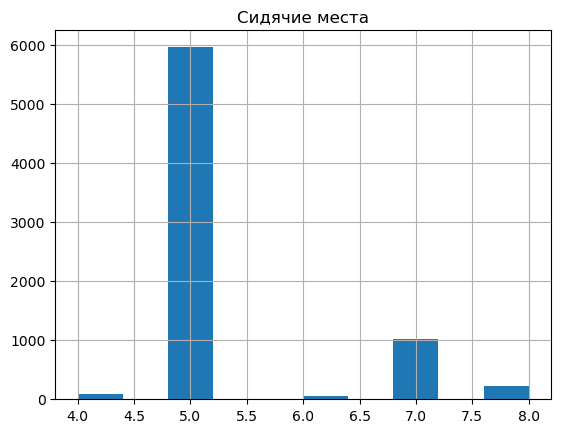

In [117]:
z=np.abs(stats.zscore(df_inta))
dum[df_inta.columns]=df_inta[(z<3).all(axis=1)]
dum=dum.dropna()
dum=dum.reset_index(drop=True)
for column in df_inta:
    plt.figure()
    dum.hist(column=[column])

In [118]:
onehot=OneHotEncoder(drop='first',sparse_output=False)
transformed=pd.DataFrame(onehot.fit_transform(dum.select_dtypes('object')),columns=onehot.get_feature_names_out())
transformed

,Марка авто_Ashok,Марка авто_Audi,Марка авто_BMW,Марка авто_Chevrolet,Марка авто_Datsun,Марка авто_Fiat,Марка авто_Force,Марка авто_Ford,Марка авто_Honda,Марка авто_Hyundai,...,Топливо_LPG,Топливо_Petrol,Тип продавца_Individual,Тип продавца_Trustmark_Dealer,Трансмиссия_Manual,Владелец_Fourth_Above_Owner,Владелец_Second_Owner,Владелец_Test_Drive_Car,Владелец_Third_Owner,Продано_Y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
7340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [119]:
dum=pd.concat([dum.select_dtypes(['int','float']),transformed],axis=1,join="inner")
dum=dum.dropna()
dum

,Год производства,Цена продажи,Пробег,Километраж,Двигатель,Максимальная мощность,Крутящий момент,Сидячие места,Марка авто_Ashok,Марка авто_Audi,...,Топливо_LPG,Топливо_Petrol,Тип продавца_Individual,Тип продавца_Trustmark_Dealer,Трансмиссия_Manual,Владелец_Fourth_Above_Owner,Владелец_Second_Owner,Владелец_Test_Drive_Car,Владелец_Third_Owner,Продано_Y
0,2014.0,450000.0,145500.0,23.40,1248.0,74.00,190.0,5.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2014.0,370000.0,120000.0,21.14,1498.0,103.52,250.0,5.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,2006.0,158000.0,140000.0,17.70,1497.0,78.00,12.7,5.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,2010.0,225000.0,127000.0,23.00,1396.0,90.00,22.4,5.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,2007.0,130000.0,120000.0,16.10,1298.0,88.20,11.5,5.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7338,2013.0,320000.0,110000.0,18.50,1197.0,82.85,113.7,5.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7339,2007.0,135000.0,119000.0,16.80,1493.0,110.00,24.0,5.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
7340,2009.0,382000.0,120000.0,19.30,1248.0,73.90,190.0,5.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7341,2013.0,290000.0,25000.0,23.57,1396.0,70.00,140.0,5.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [120]:
X = dum.drop('Цена продажи', axis = 1)
Y = dum['Цена продажи']


In [121]:
vif=pd.DataFrame()
vif['feature']=X.columns
vif['vif']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif.sort_values(by='vif').tail()

,feature,vif
23,Марка авто_Mahindra,343.214242
30,Марка авто_Tata,350.146018
16,Марка авто_Hyundai,678.234498
24,Марка авто_Maruti,1152.727643
0,Год производства,4171.852551


In [122]:
try:
    while(vif.max()[1]>5 ):
        m=vif.max()[1]
        m=vif[vif['vif']==m]['feature']
        X=X.drop(m,axis=1)
        vif=pd.DataFrame()
        vif['feature']=X.columns
        vif['vif']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
except:
    print(vif)

In [123]:
print(vif.max())
vif

feature    Топливо_Petrol
vif              3.381926
dtype: object


,feature,vif
0,Пробег,3.381926
1,Марка авто_Ashok,1.002753
2,Марка авто_Audi,1.006121
3,Марка авто_BMW,1.011875
4,Марка авто_Chevrolet,1.076396
5,Марка авто_Datsun,1.032398
6,Марка авто_Fiat,1.015046
7,Марка авто_Force,1.001773
8,Марка авто_Ford,1.129583
9,Марка авто_Honda,1.199315


In [124]:
X

,Пробег,Марка авто_Ashok,Марка авто_Audi,Марка авто_BMW,Марка авто_Chevrolet,Марка авто_Datsun,Марка авто_Fiat,Марка авто_Force,Марка авто_Ford,Марка авто_Honda,...,Регион_South,Регион_West,Топливо_LPG,Топливо_Petrol,Тип продавца_Trustmark_Dealer,Владелец_Fourth_Above_Owner,Владелец_Second_Owner,Владелец_Test_Drive_Car,Владелец_Third_Owner,Продано_Y
0,145500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,120000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,140000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3,127000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,120000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7338,110000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7339,119000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7340,120000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7341,25000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [125]:
X1=X.copy()
X1['intercept']=np.ones([X1.shape[0],1])
results = sm.OLS(Y, X1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Цена продажи   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     339.9
Date:                Thu, 18 Jan 2024   Prob (F-statistic):               0.00
Time:                        18:54:34   Log-Likelihood:            -1.0159e+05
No. Observations:                7343   AIC:                         2.033e+05
Df Residuals:                    7304   BIC:                         2.035e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Пробег                           -2.6434      0.081    -32.515      0.000      -2.803      -2.484
Марка авто_Ashok               1.851e+05   2.48e+05      0.747      0.455   -3.01e+05    6.71e+05
Марка авто_Audi                1.437e+06   5.32e+04     27.028      0.000    1.33e+06    1.54e+06
Марка авто_BMW                 1.183e+06   4.49e+04     26.348      0.000    1.09e+06    1.27e+06
Марка авто_Chevrolet          -1.424e+05   1.81e+04     -7.869      0.000   -1.78e+05   -1.07e+05
Марка авто_Datsun             -1.156e+05   3.13e+04     -3.694      0.000   -1.77e+05   -5.43e+04
Марка авто_Fiat               -1.306e+05   3.91e+04     -3.339      0.001   -2.07e+05   -5.39e+04
Марка авто_Force               3.071e+05   1.01e+05      3.033      0.002    1.09e+05    5.06e+05
Марка авто_Ford                1.774e+04   1.39e+04      1.279      0.201   -9444.014    4.49e+04
Марка авто_Honda               1.675e+05   1.28e+04     13.080      0.000    1.42e+05    1.93e+05
Марка авто_Hyundai             5.605e+04   8519.830      6.578      0.000    3.93e+04    7.27e+04
Марка авто_Isuzu               9.169e+05   1.75e+05      5.234      0.000    5.74e+05    1.26e+06
Марка авто_Jaguar              1.934e+06   4.39e+04     44.084      0.000    1.85e+06    2.02e+06
Марка авто_Jeep                1.068e+06   4.99e+04     21.390      0.000     9.7e+05    1.17e+06
Марка авто_Kia                 7.499e+05   1.24e+05      6.044      0.000    5.07e+05    9.93e+05
Марка авто_Land                1.597e+06   2.48e+05      6.442      0.000    1.11e+06    2.08e+06
Марка авто_MG                  1.276e+06   1.43e+05      8.918      0.000    9.96e+05    1.56e+06
Марка авто_Mahindra            1.549e+05   1.14e+04     13.603      0.000    1.33e+05    1.77e+05
Марка авто_Mercedes            1.221e+06    4.8e+04     25.439      0.000    1.13e+06    1.31e+06
Марка авто_Mitsubishi          6.852e+05   7.86e+04      8.717      0.000    5.31e+05    8.39e+05
Марка авто_Nissan              2.665e+04    2.8e+04      0.950      0.342   -2.83e+04    8.16e+04
Марка авто_Renault            -8954.9813   1.73e+04     -0.517      0.605   -4.29e+04     2.5e+04
Марка авто_Skoda               1.497e+05   2.52e+04      5.942      0.000       1e+05    1.99e+05
Марка авто_Tata               -8.676e+04   1.09e+04     -7.926      0.000   -1.08e+05   -6.53e+04
Марка авто_Toyota              5.126e+05   1.46e+04     35.170      0.000    4.84e+05    5.41e+05
Марка авто_Volkswagen          2.855e+04   1.92e+04      1.490      0.136   -9001.547    6.61e+04
Марка авто_Volvo               1.663e+06   4.46e+04     37.280      0.000    1.58e+06    1.75e+06
Регион_East                    2640.4797   7890.905      0.335      0.738   -1.28e+04    1.81e+04
Регион_South                    1.45e+04   83

In [126]:
display([results.pvalues[i] for i in X])
for i in X:
    if results.pvalues[i]>0.05:
        X=X.drop(i,axis=1)

[1.0301477159181478e-216,
 0.455226624595653,
 2.0158350719099025e-153,
 3.122311785831256e-146,
 4.097525965120805e-15,
 0.00022212543532708682,
 0.0008457919008441926,
 0.0024304351515362526,
 0.20081976661525283,
 1.1567915458250256e-38,
 5.085959503117358e-11,
 1.703355579269598e-07,
 0.0,
 1.661518027124905e-98,
 1.5730140615818241e-09,
 1.252009042082071e-10,
 5.911303534619506e-19,
 1.234538033087765e-41,
 7.444201309123842e-137,
 3.489930076232208e-18,
 0.34194240462272707,
 0.6048357584789918,
 2.9451706841154632e-09,
 2.60843662693929e-15,
 1.8018303142519593e-250,
 0.13616410007456606,
 1.2514019339763179e-278,
 0.7379189804796342,
 0.08268683658160068,
 0.49675482561164597,
 4.61766049443537e-11,
 4.77694941878807e-233,
 9.605888496089059e-08,
 3.121338668209832e-23,
 4.238770745113932e-91,
 4.2995072522911434e-08,
 1.2691595964791856e-41,
 0.7807077764127458]

In [127]:
pval=[results.pvalues[i] for i in X]
display(max(pval))
display(len(pval)) 

display(pval)

0.0024304351515362526

29

[1.0301477159181478e-216,
 2.0158350719099025e-153,
 3.122311785831256e-146,
 4.097525965120805e-15,
 0.00022212543532708682,
 0.0008457919008441926,
 0.0024304351515362526,
 1.1567915458250256e-38,
 5.085959503117358e-11,
 1.703355579269598e-07,
 0.0,
 1.661518027124905e-98,
 1.5730140615818241e-09,
 1.252009042082071e-10,
 5.911303534619506e-19,
 1.234538033087765e-41,
 7.444201309123842e-137,
 3.489930076232208e-18,
 2.9451706841154632e-09,
 2.60843662693929e-15,
 1.8018303142519593e-250,
 1.2514019339763179e-278,
 4.61766049443537e-11,
 4.77694941878807e-233,
 9.605888496089059e-08,
 3.121338668209832e-23,
 4.238770745113932e-91,
 4.2995072522911434e-08,
 1.2691595964791856e-41]

In [128]:
model = LinearRegression()
model.fit(X, Y)
print('R^2: {0}'.format(model.score(X, Y)))

R^2: 0.6382088501253588


In [129]:
model.coef_

array([-2.63841200e+00,  1.43250759e+06,  1.17854934e+06, -1.46511758e+05,
       -1.17796912e+05, -1.36105213e+05,  3.00777184e+05,  1.63464698e+05,
        5.25277455e+04,  9.07915569e+05,  1.93224521e+06,  1.06346684e+06,
        7.49292608e+05,  1.59177271e+06,  1.26946994e+06,  1.49609744e+05,
        1.21632591e+06,  6.76880520e+05,  1.46112905e+05, -9.12979556e+04,
        5.08091240e+05,  1.65966009e+06, -2.85901132e+05, -2.35099753e+05,
        9.64909008e+04, -2.17196723e+05, -1.44942431e+05,  9.69141232e+05,
       -1.68887292e+05])

In [130]:
pred=pd.Series(model.predict(X))

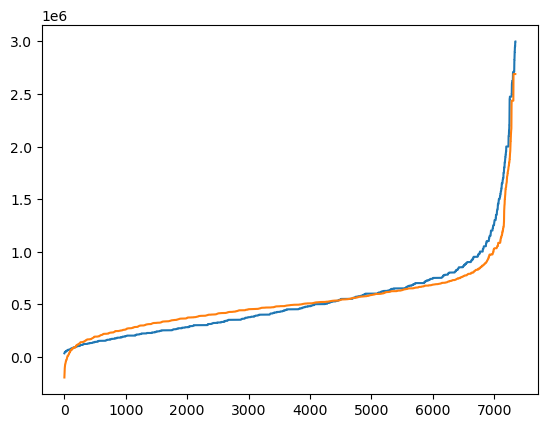

In [131]:
plt.figure()
plt.plot(range(len(Y)),Y.sort_values())
plt.plot(range(len(Y)),pred.sort_values())

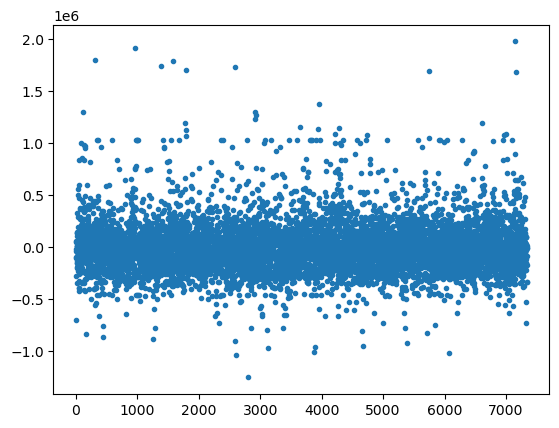

In [132]:
plt.plot(Y-pred,'.')